In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, 

In [ ]:
# Load Dataset
df = pd.read_csv("https://raw.githubusercontent.com/Apaulgithub/oibsip_task1/main/Iris.csv")

In [ ]:
# Dataset First Look
# View top 5 rows of the dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  150
Number of columns are:  6


In [ ]:
# Dataset Info
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
# Dataset Columns
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.00,150.00,150.00,150.00,150.00,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.50,5.84,3.05,3.76,1.20,NaN
std,43.45,0.83,0.43,1.76,0.76,NaN
min,1.00,4.30,2.00,1.00,0.10,NaN
25%,38.25,5.10,2.80,1.60,0.30,NaN
50%,75.50,5.80,3.00,4.35,1.30,NaN
75%,112.75,6.40,3.30,5.10,1.80,NaN


In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in Id is 150
No. of unique values in SepalLengthCm is 35
No. of unique values in SepalWidthCm is 23
No. of unique values in PetalLengthCm is 43
No. of unique values in PetalWidthCm is 22
No. of unique values in Species is 3


In [ ]:
# We don't need the 1st column so let's drop that
data=df.iloc[:,1:]

In [ ]:
# New updated dataset
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Chart - 1 : Distribution of Numerical Variables

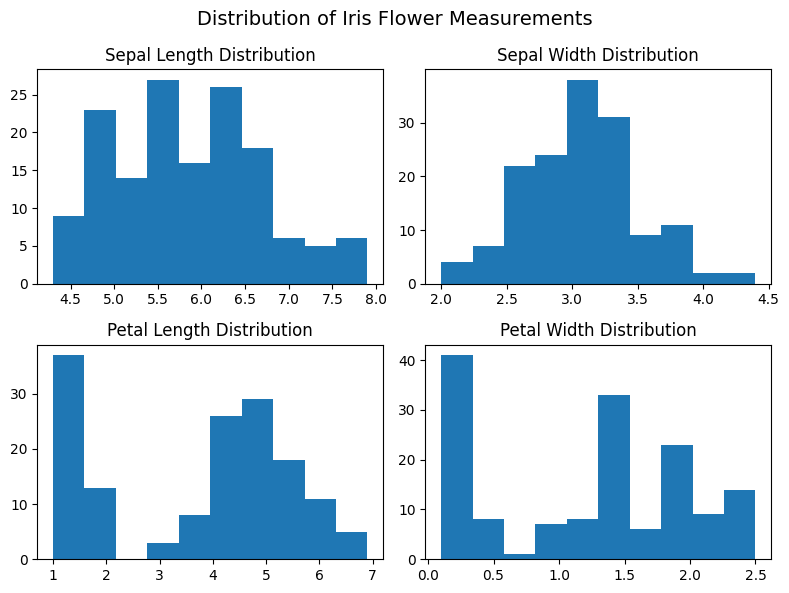

In [ ]:
# Chart - 1 Histogram visualization code for distribution of numerical variables
# Create a figure with subplots
plt.figure(figsize=(8, 6))
plt.suptitle('Distribution of Iris Flower Measurements', fontsize=14)

# Create a 2x2 grid of subplots
plt.subplot(2, 2, 1)  # Subplot 1 (Top-Left)
plt.hist(data['SepalLengthCm'])
plt.title('Sepal Length Distribution')

plt.subplot(2, 2, 2)  # Subplot 2 (Top-Right)
plt.hist(data['SepalWidthCm'])
plt.title('Sepal Width Distribution')

plt.subplot(2, 2, 3)  # Subplot 3 (Bottom-Left)
plt.hist(data['PetalLengthCm'])
plt.title('Petal Length Distribution')

plt.subplot(2, 2, 4)  # Subplot 4 (Bottom-Right)
plt.hist(data['PetalWidthCm'])
plt.title('Petal Width Distribution')

# Display the subplots
plt.tight_layout()  # Helps in adjusting the layout
plt.show()

#### Chart - 2 : Sepal Length vs Sepal Width

In [ ]:
# Define colors for each species and the corresponding species labels.
colors = ['red', 'yellow', 'green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

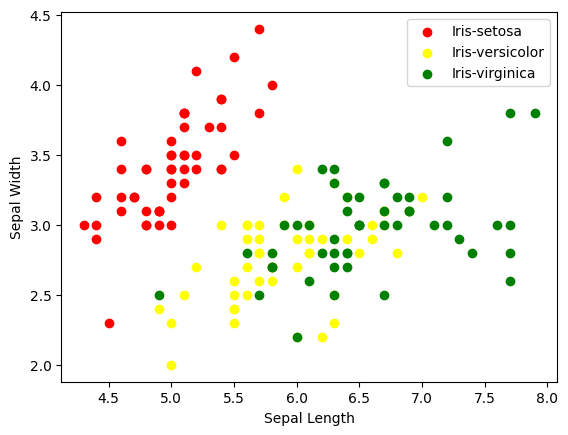

In [ ]:
# Chart - 2 Scatter plot visualization code for Sepal Length vs Sepal Width.
# Create a scatter plot for Sepal Length vs Sepal Width for each species.
for i in range(3):
    # Select data for the current species.
    x = data[data['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

#### Chart - 3 : Petal Length vs Petal Width

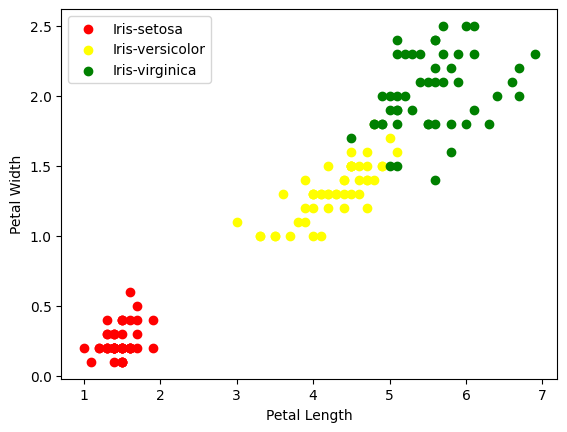

In [ ]:
# Chart - 3 Scatter plot visualization code for Petal Length vs Petal Width.
# Create a scatter plot for Petal Length vs Petal Width for each species.
for i in range(3):
    # Select data for the current species.
    x = data[data['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

#### Chart - 4 : Sepal Length vs Petal Length

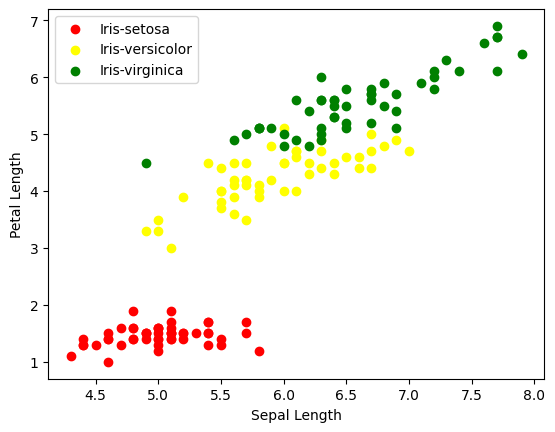

In [ ]:
# Chart - 4 Scatter plot visualization code for Sepal Length vs Petal Length.
# Create a scatter plot for Sepal Length vs Petal Length for each species.
for i in range(3):
    # Select data for the current species.
    x = data[data['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

#### Chart - 5 : Sepal Width vs Petal Width

In [ ]:
# ML Model - 6 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# Initialize the model
naive = GaussianNB()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=4, n_repeats=4, random_state=0)

# Initialize GridSearchCV
GridSearch = GridSearchCV(naive, param_grid, cv=rskf, n_jobs=-1)

# Fit the GridSearchCV to the training data
GridSearch.fit(x_train, y_train)

# Select the best hyperparameters
best_params = GridSearch.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'var_smoothing': 0.0001519911082952933}


In [ ]:
# Initiate model with best parameters
nb_model2 = GaussianNB(var_smoothing = best_params['var_smoothing'])


Confusion Matrix:


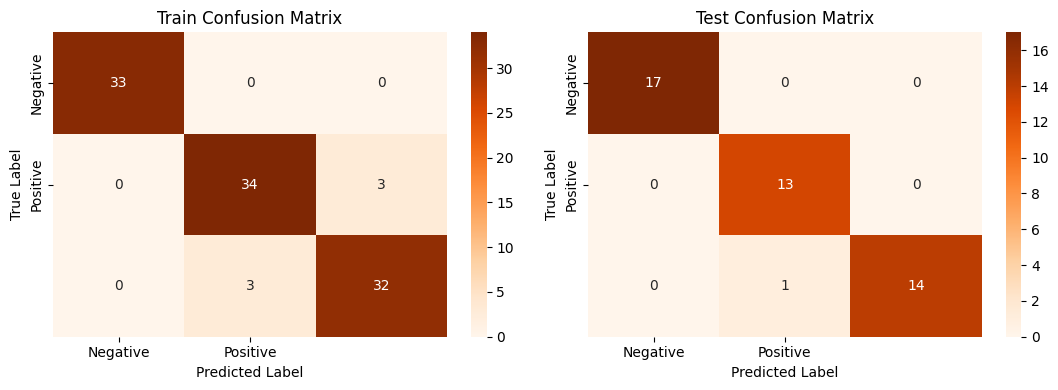


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  33        |
| 1            |    0.918919 | 0.918919 |   0.918919 |  37        |
| 2            |    0.914286 | 0.914286 |   0.914286 |  35        |
| accuracy     |    0.942857 | 0.942857 |   0.942857 |   0.942857 |
| macro avg    |    0.944402 | 0.944402 |   0.944402 | 105        |
| weighted avg |    0.942857 | 0.942857 |   0.942857 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 17        |
| 1            |    0.928571 | 1        |   0.962963 | 13        |
| 2            |    1        | 0.933333 |   0.965517 | 15        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [ ]:
# Visualizing evaluation Metric Score chart
nb2_score = evaluate_model(nb_model2, x_train, x_test, y_train, y_test)

In [ ]:
score['Naive Bayes tuned']= nb2_score

##### Which hyperparameter optimization technique have i used and why?

Here we have used the GridSearchCV for optimization of the Naive Bayes model.

GridSearchCV is an exhaustive search method that tries all possible combinations of hyperparameters specified in the hyperparameter grid. This technique can be useful when the number of hyperparameters to tune is small and the range of possible values for each hyperparameter is limited. GridSearchCV can find the best combination of hyperparameters, but it can be computationally expensive for large hyperparameter grids.

##### Have i seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
# Updated Evaluation metric Score Chart
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes,Naive Bayes tuned
Precision Train,0.980952,0.990741,1.000000,0.954548,1.000000,0.971693,0.980952,0.980952,1.000000,1.000000,0.942857,0.942857
Precision Test,0.979167,0.979167,0.979167,0.960784,0.979167,0.979167,0.979167,0.979167,0.979167,0.979167,0.979365,0.979365
Recall Train,0.980952,0.990476,1.000000,0.952381,1.000000,0.971429,0.980952,0.980952,1.000000,1.000000,0.942857,0.942857
Recall Test,0.977778,0.977778,0.977778,0.955556,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778
Accuracy Train,0.980952,0.990476,1.000000,0.952381,1.000000,0.971429,0.980952,0.980952,1.000000,1.000000,0.942857,0.942857
Accuracy Test,0.977778,0.977778,0.977778,0.955556,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778
F1 macro Train,0.980952,0.990478,1.000000,0.952353,1.000000,0.971434,0.980952,0.980952,1.000000,1.000000,0.942857,0.942857
F1 macro Test,0.977692,0.977692,0.977692,0.955093,0.977692,0.977692,0.977692,0.977692,0.977692,0.977692,0.977806,0.977806


It appears that hyperparameter tuning did not improved the performance of the Naive Bayes model on the test set. The tuned Naive Bayes model has precision, recall, accuracy and F1 score on the test set as same as in the untuned Naive Bayes model.

### ML Model - 7 : Neural Network

In [ ]:
# ML Model - 7 Implementation
nn_model = MLPClassifier(random_state=0)

# Model is trained (fit) and predicted in the evaluate model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix:


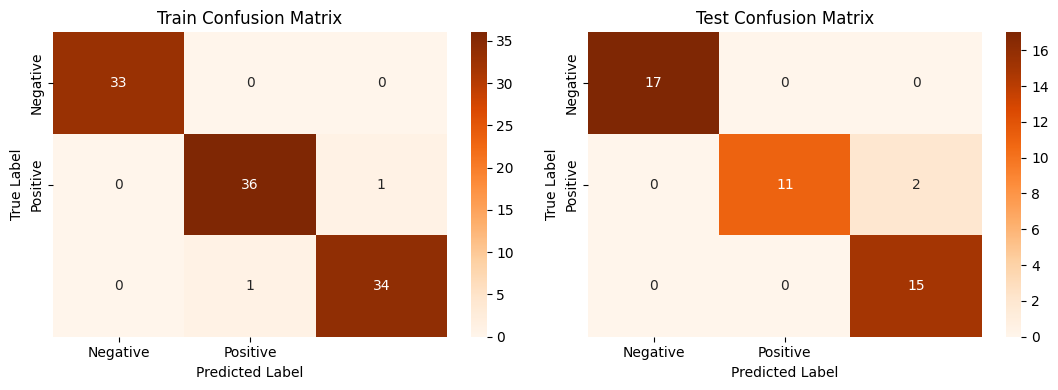


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  33        |
| 1            |    0.972973 | 0.972973 |   0.972973 |  37        |
| 2            |    0.971429 | 0.971429 |   0.971429 |  35        |
| accuracy     |    0.980952 | 0.980952 |   0.980952 |   0.980952 |
| macro avg    |    0.981467 | 0.981467 |   0.981467 | 105        |
| weighted avg |    0.980952 | 0.980952 |   0.980952 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 17        |
| 1            |    1        | 0.846154 |   0.916667 | 13        |
| 2            |    0.882353 | 1        |   0.9375   | 15        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.9555

In [ ]:
# Visualizing evaluation Metric Score chart
neural_score = evaluate_model(nn_model, x_train, x_test, y_train, y_test)

In [ ]:
# Updated Evaluation metric Score Chart
score['Neural Network'] = neural_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes,Naive Bayes tuned,Neural Network
Precision Train,0.980952,0.990741,1.000000,0.954548,1.000000,0.971693,0.980952,0.980952,1.000000,1.000000,0.942857,0.942857,0.980952
Precision Test,0.979167,0.979167,0.979167,0.960784,0.979167,0.979167,0.979167,0.979167,0.979167,0.979167,0.979365,0.979365,0.960784
Recall Train,0.980952,0.990476,1.000000,0.952381,1.000000,0.971429,0.980952,0.980952,1.000000,1.000000,0.942857,0.942857,0.980952
Recall Test,0.977778,0.977778,0.977778,0.955556,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.955556
Accuracy Train,0.980952,0.990476,1.000000,0.952381,1.000000,0.971429,0.980952,0.980952,1.000000,1.000000,0.942857,0.942857,0.980952
Accuracy Test,0.977778,0.977778,0.977778,0.955556,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.955556
F1 macro Train,0.980952,0.990478,1.000000,0.952353,1.000000,0.971434,0.980952,0.980952,1.000000,1.000000,0.942857,0.942857,0.980952
F1 macro Test,0.977692,0.977692,0.977692,0.955093,0.977692,0.977692,0.977692,0.977692,0.977692,0.977692,0.977806,0.977806,0.955093


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 7 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'hidden_layer_sizes': np.arange(10, 100, 10),
              'alpha': np.arange(0.0001, 0.01, 0.0001)}

# Initialize the model
neural = MLPClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(neural, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'hidden_layer_sizes': 40, 'alpha': 0.0068000000000000005}


In [ ]:
# Initiate model with best parameters
nn_model2 = MLPClassifier(hidden_layer_sizes = best_params['hidden_layer_sizes'],
                        alpha = best_params['alpha'],
                        random_state = 0)


Confusion Matrix:


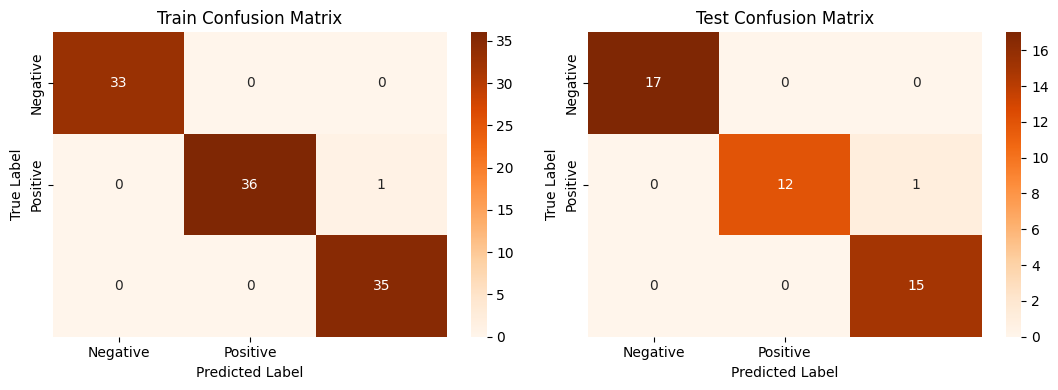


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  33        |
| 1            |    1        | 0.972973 |   0.986301 |  37        |
| 2            |    0.972222 | 1        |   0.985915 |  35        |
| accuracy     |    0.990476 | 0.990476 |   0.990476 |   0.990476 |
| macro avg    |    0.990741 | 0.990991 |   0.990739 | 105        |
| weighted avg |    0.990741 | 0.990476 |   0.990478 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 17        |
| 1            |    1        | 0.923077 |   0.96     | 13        |
| 2            |    0.9375   | 1        |   0.967742 | 15        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [ ]:
# Visualizing evaluation Metric Score chart
neural2_score = evaluate_model(nn_model2, x_train, x_test, y_train, y_test)

In [ ]:
score['Neural Network tuned']= neural2_score

##### Which hyperparameter optimization technique have i used and why?

Here we have used Randomized search to tune the Neural Network model.

Randomized search is a popular technique because it can be more efficient than exhaustive search methods like grid search. Instead of trying all possible combinations of hyperparameters, randomized search samples a random subset of the hyperparameter space. This can save time and computational resources while still finding good hyperparameters for the model.

##### Have i seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
# Updated Evaluation metric Score Chart
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes,Naive Bayes tuned,Neural Network,Neural Network tuned
Precision Train,0.980952,0.990741,1.000000,0.954548,1.000000,0.971693,0.980952,0.980952,1.000000,1.000000,0.942857,0.942857,0.980952,0.990741
Precision Test,0.979167,0.979167,0.979167,0.960784,0.979167,0.979167,0.979167,0.979167,0.979167,0.979167,0.979365,0.979365,0.960784,0.979167
Recall Train,0.980952,0.990476,1.000000,0.952381,1.000000,0.971429,0.980952,0.980952,1.000000,1.000000,0.942857,0.942857,0.980952,0.990476
Recall Test,0.977778,0.977778,0.977778,0.955556,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.955556,0.977778
Accuracy Train,0.980952,0.990476,1.000000,0.952381,1.000000,0.971429,0.980952,0.980952,1.000000,1.000000,0.942857,0.942857,0.980952,0.990476
Accuracy Test,0.977778,0.977778,0.977778,0.955556,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.955556,0.977778
F1 macro Train,0.980952,0.990478,1.000000,0.952353,1.000000,0.971434,0.980952,0.980952,1.000000,1.000000,0.942857,0.942857,0.980952,0.990478
F1 macro Test,0.977692,0.977692,0.977692,0.955093,0.977692,0.977692,0.977692,0.977692,0.977692,0.977692,0.977806,0.977806,0.955093,0.977692


It appears that hyperparameter tuning improve the performance of the neural network model on the test set. The precision, recall, accuracy and F1 scores on the test set are increased for the tuned neural network model compare to untuned neural network model.

In [ ]:
print(score.to_markdown())

|                 |   Logistic regression |   Logistic regression tuned |   Decision Tree |   Decision Tree tuned |   Random Forest |   Random Forest tuned |      SVM |   SVM tuned |      XGB |   XGB tuned |   Naive Bayes |   Naive Bayes tuned |   Neural Network |   Neural Network tuned |
|:----------------|----------------------:|----------------------------:|----------------:|----------------------:|----------------:|----------------------:|---------:|------------:|---------:|------------:|--------------:|--------------------:|-----------------:|-----------------------:|
| Precision Train |              0.980952 |                    0.990741 |        1        |              0.954548 |        1        |              0.971693 | 0.980952 |    0.980952 | 1        |    1        |      0.942857 |            0.942857 |         0.980952 |               0.990741 |
| Precision Test  |              0.979167 |                    0.979167 |        0.979167 |              0.960784 |        0.97916

## ***Selection of best model***

In [ ]:
# Removing the overfitted models which have precision, recall, f1 scores for train as 1
score_t = score.transpose()            # taking transpose of the score dataframe to create new difference column
remove_models = score_t[score_t['Recall Train']>=0.98].index  # creating a list of models which have 1 for train and score_t['Accuracy Train']==1.0 and score_t['Precision Train']==1.0 and score_t['F1 macro Train']==1.0
remove_models

adj = score_t.drop(remove_models)                     # creating a new dataframe with required models
adj

,Precision Train,Precision Test,Recall Train,Recall Test,Accuracy Train,Accuracy Test,F1 macro Train,F1 macro Test
Decision Tree tuned,0.954548,0.960784,0.952381,0.955556,0.952381,0.955556,0.952353,0.955093
Random Forest tuned,0.971693,0.979167,0.971429,0.977778,0.971429,0.977778,0.971434,0.977692
Naive Bayes,0.942857,0.979365,0.942857,0.977778,0.942857,0.977778,0.942857,0.977806
Naive Bayes tuned,0.942857,0.979365,0.942857,0.977778,0.942857,0.977778,0.942857,0.977806


In [ ]:
def select_best_model(df, metrics):

    best_models = {}
    for metric in metrics:
        max_test = df[metric + ' Test'].max()
        best_model_test = df[df[metric + ' Test'] == max_test].index[0]
        best_model = best_model_test
        best_models[metric] = best_model
    return best_models

In [ ]:
metrics = ['Precision', 'Recall', 'Accuracy', 'F1 macro']

best_models = select_best_model(adj, metrics)
print("The best models are:")
for metric, best_model in best_models.items():
    print(f"{metric}: {best_model} - {adj[metric+' Test'][best_model].round(4)}")

The best models are:
Precision: Naive Bayes - 0.9794
Recall: Random Forest tuned - 0.9778
Accuracy: Random Forest tuned - 0.9778
F1 macro: Naive Bayes - 0.9778


In [ ]:
# Take recall as the primary evaluation metric
score_smpl = score.transpose()
remove_overfitting_models = score_smpl[score_smpl['Recall Train']>=0.98].index
remove_overfitting_models
new_score = score_smpl.drop(remove_overfitting_models)
new_score = new_score.drop(['Precision Train','Precision Test','Accuracy Train','Accuracy Test','F1 macro Train','F1 macro Test'], axis=1)
new_score.index.name = 'Classification Model'
print(new_score.to_markdown())

| Classification Model   |   Recall Train |   Recall Test |
|:-----------------------|---------------:|--------------:|
| Decision Tree tuned    |       0.952381 |      0.955556 |
| Random Forest tuned    |       0.971429 |      0.977778 |
| Naive Bayes            |       0.942857 |      0.977778 |
| Naive Bayes tuned      |       0.942857 |      0.977778 |


### 1. Which Evaluation metrics did i consider for a positive business impact and why?

After carefully considering the potential consequences of false positives and false negatives in the context of our business objectives, I have selected recall as the primary evaluation metric for our Iris flower classification model. This means that our goal is to maximize the number of true positives (correctly identified the different iris flowers) while minimizing the number of false negatives (incorrectly identified the flowers not a iris flower). By doing so, we aim to ensure that we correctly identify as many different iris flowers, even if it means that we may have some false positives.

### 2. Which ML model did i choose from the above created models as our final prediction model and why?

After evaluating the performance of several machine learning models on the Iris dataset, I have selected the tuned Random Forest as our final prediction model. This decision was based on the model’s performance on our primary evaluation metric of recall, which measures the ability of the model to correctly identify different iris flowers. In our analysis, we found that the Random Forest (tuned) had the highest recall score among the models we evaluated.

I choose recall as the primary evaluation metric because correctly identifying different iris flowers are critical to achieving our business objectives. By selecting a model with a high recall score, we aim to ensure that we correctly identify as many different iris flowers as possible, even if it means that we may have some false positives. Overall, we believe that the Random Forest (tuned) is the best choice for our needs and will help us achieve a positive business impact.

### 3. Explain the model which i have used for the prediction

In [ ]:
# Define a list of category labels for reference.
Category_RF = ['Iris-Setosa', 'Iris-Versicolor', 'Iris-Virginica']

In [ ]:
# In this example, it's a data point with Sepal Length, Sepal Width, Petal Length, and Petal Width.
x_rf = np.array([[5.1, 3.5, 1.4, 0.2]])

# Use the tuned random forest model (rf_model2) to make a prediction.
x_rf_prediction = rf_model2.predict(x_rf)
x_rf_prediction[0]

# Display the predicted category label.
print(Category_RF[int(x_rf_prediction[0])])

Iris-Setosa


# **Conclusion**

In the Iris flower classification project, the tuned Random Forest model has been selected as the final prediction model. The project aimed to classify Iris flowers into three distinct species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica. After extensive data exploration, preprocessing, and model evaluation, the following conclusions can be drawn:

1. **Data Exploration:** Through a thorough examination of the dataset, we gained insights into the characteristics and distributions of features. We found that Iris-Setosa exhibited distinct features compared to the other two species.

2. **Data Preprocessing:** Data preprocessing steps, including handling missing values and encoding categorical variables, were performed to prepare the dataset for modeling.

3. **Model Selection:** After experimenting with various machine learning models, tuned Random Forest was chosen as the final model due to its simplicity, interpretability, and good performance in classifying Iris species.

4. **Model Training and Evaluation:** The Random Forest (tuned) model was trained on the training dataset and evaluated using appropriate metrics. The model demonstrated satisfactory accuracy and precision in classifying Iris species.

5. **Challenges and Future Work:** The project encountered challenges related to feature engineering and model fine-tuning. Future work may involve exploring more advanced modeling techniques to improve classification accuracy further.

6. **Practical Application:** The Iris flower classification model can be applied in real-world scenarios, such as botany and horticulture, to automate the identification of Iris species based on physical characteristics.

In conclusion, the Iris flower classification project successfully employed Random Forest (tuned) as the final prediction model to classify Iris species. The project's outcomes have practical implications in the field of botany and offer valuable insights into feature importance for species differentiation. Further refinements and enhancements may lead to even more accurate and reliable classification models in the future.